# Computing the optimal statistic with enterprise

In this notebook you will learn how to compute the optimal statistic. The optimal statistic is a frequentist detection statistic for the stochastic background. It assesses the significance of the cross-correlations, and compares them to the Hellings-Downs curve.

For more information, see [Anholm et al. 2009](https://arxiv.org/abs/0809.0701), [Demorest et al. 2013](https://arxiv.org/abs/1201.6641), [Chamberlin et al. 2015](https://arxiv.org/abs/1410.8256), [Vigeland et al. 2018](https://arxiv.org/abs/1805.12188).

This notebook shows you how to compute the optimal statistic for the 12.5yr data set.

To run this notebook without using your own computer, we have prepared a [Google Colab notebook](https://colab.research.google.com/drive/1VNLbutN7cKJM2jl6LId0IgkGJDszDloC#scrollTo=bwMNlFWuQhnB).

## Imports, data loading, and setup

In [2]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
import numpy as np
import pickle
import json
import glob
import os

import matplotlib.pyplot as plt
%matplotlib inline

from enterprise.signals import signal_base
from enterprise.signals import gp_signals, parameter
from enterprise.pulsar import Pulsar
from enterprise_extensions.chromatic.solar_wind import solar_wind_block
from enterprise_extensions.chromatic import dm_exponential_dip

from enterprise_extensions import model_utils, blocks
from enterprise_extensions.frequentist import optimal_statistic as opt_stat

import h5py

import la_forge.core as co

In [3]:
import pickle
with open('/Users/physics/Desktop/OS_2023_data/ng15_nodmx.pkl','rb') as fin:
    psrs=pickle.load(fin)

In [4]:
for p in psrs: 
    print(p.name)

B1855+09
B1937+21
B1953+29
J0023+0923
J0030+0451
J0340+4130
J0406+3039
J0437-4715
J0509+0856
J0557+1551
J0605+3757
J0610-2100
J0613-0200
J0614-3329
J0636+5128
J0645+5158
J0709+0458
J0740+6620
J0931-1902
J1012-4235
J1012+5307
J1022+1001
J1024-0719
J1125+7819
J1312+0051
J1453+1902
J1455-3330
J1600-3053
J1614-2230
J1630+3734
J1640+2224
J1643-1224
J1705-1903
J1713+0747
J1719-1438
J1730-2304
J1738+0333
J1741+1351
J1744-1134
J1745+1017
J1747-4036
J1751-2857
J1802-2124
J1811-2405
J1832-0836
J1843-1113
J1853+1303
J1903+0327
J1909-3744
J1910+1256
J1911+1347
J1918-0642
J1923+2515
J1944+0907
J1946+3417
J2010-1323
J2017+0603
J2033+1734
J2043+1711
J2124-3358
J2145-0750
J2214+3000
J2229+2643
J2234+0611
J2234+0944
J2302+4442
J2317+1439
J2322+2057


In [5]:
for p in psrs:
    p.name=p.name+'_ng'

In [6]:
for p in psrs: 
    print(p.name)

B1855+09_ng
B1937+21_ng
B1953+29_ng
J0023+0923_ng
J0030+0451_ng
J0340+4130_ng
J0406+3039_ng
J0437-4715_ng
J0509+0856_ng
J0557+1551_ng
J0605+3757_ng
J0610-2100_ng
J0613-0200_ng
J0614-3329_ng
J0636+5128_ng
J0645+5158_ng
J0709+0458_ng
J0740+6620_ng
J0931-1902_ng
J1012-4235_ng
J1012+5307_ng
J1022+1001_ng
J1024-0719_ng
J1125+7819_ng
J1312+0051_ng
J1453+1902_ng
J1455-3330_ng
J1600-3053_ng
J1614-2230_ng
J1630+3734_ng
J1640+2224_ng
J1643-1224_ng
J1705-1903_ng
J1713+0747_ng
J1719-1438_ng
J1730-2304_ng
J1738+0333_ng
J1741+1351_ng
J1744-1134_ng
J1745+1017_ng
J1747-4036_ng
J1751-2857_ng
J1802-2124_ng
J1811-2405_ng
J1832-0836_ng
J1843-1113_ng
J1853+1303_ng
J1903+0327_ng
J1909-3744_ng
J1910+1256_ng
J1911+1347_ng
J1918-0642_ng
J1923+2515_ng
J1944+0907_ng
J1946+3417_ng
J2010-1323_ng
J2017+0603_ng
J2033+1734_ng
J2043+1711_ng
J2124-3358_ng
J2145-0750_ng
J2214+3000_ng
J2229+2643_ng
J2234+0611_ng
J2234+0944_ng
J2302+4442_ng
J2317+1439_ng
J2322+2057_ng


In [7]:
# Load up the noise dictionary to get values for the white noise parameters
# Change the noisefile to point to where you have saved the noisefile
noisefile = '/Users/physics/Desktop/OS_2023_data/ng15_noisedict_dmgp.json'

with open(noisefile, 'r') as f:
    noisedict = json.load(f)

In [8]:
for ky in noisedict.keys():
    print(ky)

B1855+09_430_ASP_efac
B1855+09_430_ASP_log10_ecorr
B1855+09_430_ASP_log10_t2equad
B1855+09_430_PUPPI_efac
B1855+09_430_PUPPI_log10_ecorr
B1855+09_430_PUPPI_log10_t2equad
B1855+09_L-wide_ASP_efac
B1855+09_L-wide_ASP_log10_ecorr
B1855+09_L-wide_ASP_log10_t2equad
B1855+09_L-wide_PUPPI_efac
B1855+09_L-wide_PUPPI_log10_ecorr
B1855+09_L-wide_PUPPI_log10_t2equad
B1855+09_dm_gp_gamma
B1855+09_dm_gp_log10_A
B1855+09_red_noise_gamma
B1855+09_red_noise_log10_A
B1937+21_L-wide_ASP_efac
B1937+21_L-wide_ASP_log10_ecorr
B1937+21_L-wide_ASP_log10_t2equad
B1937+21_L-wide_PUPPI_efac
B1937+21_L-wide_PUPPI_log10_ecorr
B1937+21_L-wide_PUPPI_log10_t2equad
B1937+21_Rcvr1_2_GASP_efac
B1937+21_Rcvr1_2_GASP_log10_ecorr
B1937+21_Rcvr1_2_GASP_log10_t2equad
B1937+21_Rcvr1_2_GUPPI_efac
B1937+21_Rcvr1_2_GUPPI_log10_ecorr
B1937+21_Rcvr1_2_GUPPI_log10_t2equad
B1937+21_Rcvr_800_GASP_efac
B1937+21_Rcvr_800_GASP_log10_ecorr
B1937+21_Rcvr_800_GASP_log10_t2equad
B1937+21_Rcvr_800_GUPPI_efac
B1937+21_Rcvr_800_GUPPI_log10_ec

In [9]:
noisedictcp2=noisedict.copy()
for ky,val in noisedict.items():
    split=ky.split('_')
    split.insert(1,'ng')
    kynew='_'.join(split)
    noisedictcp2[kynew] = noisedict[ky]
for ky,val in noisedict.items():
    if ky in noisedict:
        noisedictcp2.pop(ky)

In [10]:
noisedictcp2

{'B1855+09_ng_430_ASP_efac': 1.1174654375628088,
 'B1855+09_ng_430_ASP_log10_ecorr': -7.154014717954048,
 'B1855+09_ng_430_ASP_log10_t2equad': -7.348069312036465,
 'B1855+09_ng_430_PUPPI_efac': 1.0139936317710494,
 'B1855+09_ng_430_PUPPI_log10_ecorr': -6.046551466246857,
 'B1855+09_ng_430_PUPPI_log10_t2equad': -7.049516829030994,
 'B1855+09_ng_L-wide_ASP_efac': 1.0615612795806062,
 'B1855+09_ng_L-wide_ASP_log10_ecorr': -6.1169704178925315,
 'B1855+09_ng_L-wide_ASP_log10_t2equad': -6.5382289648959055,
 'B1855+09_ng_L-wide_PUPPI_efac': 1.1122733899652097,
 'B1855+09_ng_L-wide_PUPPI_log10_ecorr': -6.563848794177956,
 'B1855+09_ng_L-wide_PUPPI_log10_t2equad': -7.75355083041873,
 'B1855+09_ng_dm_gp_gamma': 2.603458981056696,
 'B1855+09_ng_dm_gp_log10_A': -13.42146315959487,
 'B1855+09_ng_red_noise_gamma': 3.5972462199789494,
 'B1855+09_ng_red_noise_log10_A': -13.848683350466082,
 'B1937+21_ng_L-wide_ASP_efac': 2.3208208237644925,
 'B1937+21_ng_L-wide_ASP_log10_ecorr': -6.8558664613362685,
 

In [10]:
'''
#Run once to save renamed files then can load at convience 
noise=noisedictcp2
# create a binary pickle file 
f = open("/Users/physics/nanogw/data/ng_noise_params.pkl","wb")
# write the python object (dict) to pickle file
pickle.dump(noise,f)
# close file
f.close()
'''

'\n#Run once to save renamed files then can load at convience \nnoise=noisedictcp2\n# create a binary pickle file \nf = open("/Users/physics/nanogw/data/ng_noise_params.pkl","wb")\n# write the python object (dict) to pickle file\npickle.dump(noise,f)\n# close file\nf.close()\n'

In [11]:
%%time
# (Note: It may take a few minutes to run this cell and may require at least ~4GB RAM)
# Initialize the optimal statistic object
# You can give it a list of pulsars and the noise dictionary, and it will create the pta object for you
# Alternatively, you can make the pta object yourself and give it to the OptimalStatistic object as an argument

# find the maximum time span to set GW frequency sampling
Tspan = model_utils.get_tspan(psrs)

tm = gp_signals.TimingModel(use_svd=True)

wn = blocks.white_noise_block(vary=False, inc_ecorr=True, select='backend')


rn = blocks.red_noise_block(components=30, Tspan=Tspan)

dmgp = blocks.dm_noise_block(components=100, Tspan=Tspan)
dmgp += solar_wind_block(include_swgp=False)

crn = blocks.common_red_noise_block(
    components=14,
    orf=None,
    Tspan=Tspan,
    name="gw"
)

s_crn = tm + wn + rn + dmgp + crn

models = []
for p in psrs:
    s = s_crn
    if p.name == "J1713+0747_ng":
        s += dm_exponential_dip(54700, 54800, 
                                idx=parameter.Uniform(1, 5),
                                name="dmexp_0")
        s += dm_exponential_dip(57500, 57520, 
                                idx=parameter.Uniform(1, 5),
                                name="dmexp_1")
    models.append(s(p))
pta = signal_base.PTA(models)
pta.set_default_params(noisedictcp2)

#models=[]
#for p in psrs:
#    models.append(s(p))
""" 
import cloudpickle
with open('/Users/physics/nanogw/data/ng_models.pkl','wb') as fout:
    cloudpickle.dump(models,fout)

"""

CPU times: user 15.9 s, sys: 1.41 s, total: 17.3 s
Wall time: 17.4 s


" \nimport cloudpickle\nwith open('/Users/physics/nanogw/data/ng_models.pkl','wb') as fout:\n    cloudpickle.dump(models,fout)\n\n"

In [7]:

#Code to generate and save max likelihood parameters only need to run once
#To get the files generated 
c0 = co.Core(chaindir='/Users/physics/Desktop/OS_2023_data/crn_dmgp_run2/')
#max_like=c0.get_map_dict()
# create a binary pickle file 
#f = open("/Users/physics/Desktop/OS_2023_data/ng_ml_params.json","w")
# write the python object (dict) to pickle file
#json.dump(max_like,f)
# close file
#f.close()


In [36]:
c0.save("/Users/physics/Desktop/OS_2023_data/ppta_dmgp_core.h5")

NameError: name 'c0' is not defined

In [31]:
#c0=co.Core(corepath="/Users/physics/Desktop/OS_2023_data/ng_dmgp_core.h5")

Loading data from HDF5 file....


In [12]:
# Load up the maximum-likelihood values for the pulsars' red noise parameters and the common red process
# These values come from the results of a Bayesian search V2


#NOT WORKING ASK FOR HELP BECAUSE THIS IS ANNOYING!
with open("/Users/physics/Desktop/OS_2023_data/ng_ml_params.json", 'r') as f:
    ml_params = json.load(f)

In [13]:
ml_params

{'B1855+09_dm_gp_gamma': 2.9482654417199257,
 'B1855+09_dm_gp_log10_A': -13.436056727838814,
 'B1855+09_red_noise_gamma': 4.523557214214118,
 'B1855+09_red_noise_log10_A': -14.001646062312513,
 'B1937+21_dm_gp_gamma': 2.613564028831798,
 'B1937+21_dm_gp_log10_A': -12.889218215812955,
 'B1937+21_red_noise_gamma': 3.8010443580065756,
 'B1937+21_red_noise_log10_A': -13.544427089805046,
 'B1953+29_dm_gp_gamma': 2.032695770829402,
 'B1953+29_dm_gp_log10_A': -12.62040204694267,
 'B1953+29_red_noise_gamma': 1.8269508897802473,
 'B1953+29_red_noise_log10_A': -12.68323824770825,
 'J0023+0923_dm_gp_gamma': 0.8529462067360911,
 'J0023+0923_dm_gp_log10_A': -13.266267621689943,
 'J0023+0923_red_noise_gamma': 0.1815527260841805,
 'J0023+0923_red_noise_log10_A': -13.07602638487424,
 'J0030+0451_dm_gp_gamma': 0.7952999773799613,
 'J0030+0451_dm_gp_log10_A': -13.58521051942166,
 'J0030+0451_red_noise_gamma': 6.193623256133677,
 'J0030+0451_red_noise_log10_A': -15.151031405290738,
 'J0340+4130_dm_gp_gam

In [14]:
ml_paramscp=ml_params.copy()
for ky,val in ml_params.items():
    if "earth" not in ky:
        split=ky.split('_')
        split.insert(1,'ng')
        kynew='_'.join(split)
        ml_paramscp[kynew] = ml_params[ky]
    else:
        ml_paramscp[ky] = ml_params[ky]
for ky,val in ml_params.items():
    if ky in ml_params and "earth" not in ky:
        ml_paramscp.pop(ky)
ml_paramscp['gw_log10_A']=ml_paramscp['crn_ng_log10_A']
ml_paramscp['gw_gamma']=ml_paramscp['crn_ng_gamma']

In [15]:
ml_paramscp

{'n_earth': 5.353825462574841,
 'B1855+09_ng_dm_gp_gamma': 2.9482654417199257,
 'B1855+09_ng_dm_gp_log10_A': -13.436056727838814,
 'B1855+09_ng_red_noise_gamma': 4.523557214214118,
 'B1855+09_ng_red_noise_log10_A': -14.001646062312513,
 'B1937+21_ng_dm_gp_gamma': 2.613564028831798,
 'B1937+21_ng_dm_gp_log10_A': -12.889218215812955,
 'B1937+21_ng_red_noise_gamma': 3.8010443580065756,
 'B1937+21_ng_red_noise_log10_A': -13.544427089805046,
 'B1953+29_ng_dm_gp_gamma': 2.032695770829402,
 'B1953+29_ng_dm_gp_log10_A': -12.62040204694267,
 'B1953+29_ng_red_noise_gamma': 1.8269508897802473,
 'B1953+29_ng_red_noise_log10_A': -12.68323824770825,
 'J0023+0923_ng_dm_gp_gamma': 0.8529462067360911,
 'J0023+0923_ng_dm_gp_log10_A': -13.266267621689943,
 'J0023+0923_ng_red_noise_gamma': 0.1815527260841805,
 'J0023+0923_ng_red_noise_log10_A': -13.07602638487424,
 'J0030+0451_ng_dm_gp_gamma': 0.7952999773799613,
 'J0030+0451_ng_dm_gp_log10_A': -13.58521051942166,
 'J0030+0451_ng_red_noise_gamma': 6.19362

In [16]:
print(pta.summary())

enterprise v3.3.2,  Python v3.9.16

Signal Name                              Signal Class                   no. Parameters      
B1855+09_ng_linear_timing_model_svd      TimingModel                    0                   

params:
__________________________________________________________________________________________
B1855+09_ng_measurement_noise            MeasurementNoise               0                   

params:
B1855+09_ng_430_ASP_efac:Constant=1.1174654375628088                                      
B1855+09_ng_430_ASP_log10_t2equad:Constant=-7.348069312036465                             
B1855+09_ng_430_PUPPI_efac:Constant=1.0139936317710494                                    
B1855+09_ng_430_PUPPI_log10_t2equad:Constant=-7.049516829030994                           
B1855+09_ng_L-wide_ASP_efac:Constant=1.0615612795806062                                   
B1855+09_ng_L-wide_ASP_log10_t2equad:Constant=-6.5382289648959055                         
B1855+09_ng_L-wide_PUPPI_efac:

In [17]:
for ky in ml_paramscp.keys():
    if ky not in pta.param_names:
        print(ky)

crn_ng_gamma
crn_ng_log10_A
lnpost_ng
lnlike_ng
chain_ng_accept
pt_ng_chain_accept


In [19]:
'''
#Run once to save renamed files then can load at convience 
ml=ml_paramscp
# create a binary pickle file 
f = open("/Users/physics/nanogw/data/ng_ml_params_renamed.pkl","wb")
# write the python object (dict) to pickle file
pickle.dump(ml,f)
# close file
f.close()
'''

'\n#Run once to save renamed files then can load at convience \nml=ml_paramscp\n# create a binary pickle file \nf = open("/Users/physics/nanogw/data/ng_ml_params_renamed.pkl","wb")\n# write the python object (dict) to pickle file\npickle.dump(ml,f)\n# close file\nf.close()\n'

## Optimal statistics with maximum likelihood noise parameters

In [27]:
ostat = opt_stat.OptimalStatistic(psrs, pta=pta, orf='hd',gamma_common=None)
ostat_dip = opt_stat.OptimalStatistic(psrs, pta=pta, orf='dipole',gamma_common=None)
ostat_mono = opt_stat.OptimalStatistic(psrs, pta=pta, orf='monopole',gamma_common=None)

In [28]:
# Compute the optimal statistic
# The optimal statistic returns five quantities:
#  - xi: an array of the angular separations between the pulsar pairs (in radians)
#  - rho: an array of the cross-correlations between the pulsar pairs
#  - sig: an array of the uncertainty in the cross-correlations
#  - OS: the value of the optimal statistic
#  - OS_sig: the uncertainty in the optimal statistic

xi, rho, sig, OS, OS_sig = ostat.compute_os(params=ml_paramscp) #HD


_, _, _, OS_dip, OS_sig_dip = ostat_dip.compute_os(params=ml_paramscp) #Dipole


_, _, _, OS_mono, OS_sig_mono = ostat_mono.compute_os(params=ml_paramscp) #Monopole 

3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6


3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6


3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6
3.6


In [29]:
print(OS, OS_sig, OS/OS_sig)
print(OS_dip, OS_sig_dip, OS_dip/OS_sig_dip)
print(OS_mono, OS_sig_mono, OS_mono/OS_sig_mono)

2.859463102563786e-29 4.736729224874896e-30 6.036788186133457
5.60161594310335e-30 1.2761527249354059e-30 4.38945577096729
3.88264800803431e-30 8.465020948788397e-31 4.5866962781586915


In [17]:
# Plot the cross-correlations and compare to the Hellings-Downs curve
# Before plotting, we need to bin the cross-correlations

def weightedavg(rho, sig):
    weights, avg = 0., 0.
    for r,s in zip(rho,sig):
        weights += 1./(s*s)
        avg += r/(s*s)
        
    return avg/weights, np.sqrt(1./weights)

def bin_crosscorr(zeta, xi, rho, sig):
    
    rho_avg, sig_avg = np.zeros(len(zeta)), np.zeros(len(zeta))
    
    for i,z in enumerate(zeta[:-1]):
        myrhos, mysigs = [], []
        for x,r,s in zip(xi,rho,sig):
            if x >= z and x < (z+10.):
                myrhos.append(r)
                mysigs.append(s)
        rho_avg[i], sig_avg[i] = weightedavg(myrhos, mysigs)
        
    return rho_avg, sig_avg

# sort the cross-correlations by xi
idx = np.argsort(xi)

xi_sorted = xi[idx]
rho_sorted = rho[idx]
sig_sorted = sig[idx]

# bin the cross-correlations so that there are the same number of pairs per bin
npairs = 66

xi_mean = []
xi_err = []

rho_avg = []
sig_avg = []

i = 0
while i < len(xi_sorted):
    
    xi_mean.append(np.mean(xi_sorted[i:npairs+i]))
    xi_err.append(np.std(xi_sorted[i:npairs+i]))

    r, s = weightedavg(rho_sorted[i:npairs+i], sig_sorted[i:npairs+i])
    rho_avg.append(r)
    sig_avg.append(s)
    
    i += npairs
    
xi_mean = np.array(xi_mean)
xi_err = np.array(xi_err)

In [18]:
def get_HD_curve(zeta):
    
    coszeta = np.cos(zeta*np.pi/180.)
    xip = (1.-coszeta) / 2.
    HD = 3.*( 1./3. + xip * ( np.log(xip) -1./6.) )
    
    return HD/2

## Figure 5 (bottom panel)

/var/folders/l7/87dndmjx4v7g4wntkdmqbyv00000gp/T/ipykernel_7803/3587602911.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.


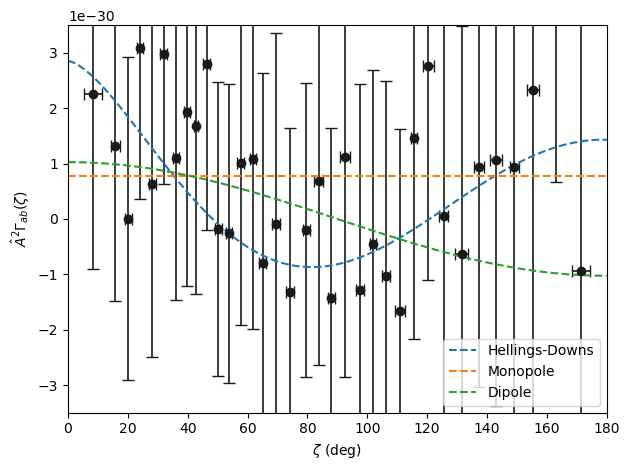

In [19]:
# reproduce the bottom panel of Figure 5 in https://arxiv.org/abs/2009.04496

(_, caps, _) = plt.errorbar(xi_mean*180/np.pi, rho_avg, xerr=xi_err*180/np.pi, yerr=sig_avg, marker='o', ls='', 
                            color='0.1', fmt='o', capsize=4, elinewidth=1.2)

zeta = np.linspace(0.01,180,100)
HD = get_HD_curve(zeta+1)

plt.plot(zeta, OS*HD, ls='--', label='Hellings-Downs', color='C0', lw=1.5)
plt.plot(zeta, zeta*0.0+OS_mono, ls='--', label='Monopole', color='C1', lw=1.5)
plt.plot(zeta, OS_dip*np.cos(zeta*np.pi/180), ls='--', label='Dipole', color='C2', lw=1.5)

plt.xlim(0, 180);
plt.ylim(-3.5e-30, 3.5e-30);
plt.ylabel(r'$\hat{A}^2 \Gamma_{ab}(\zeta)$')
plt.xlabel(r'$\zeta$ (deg)');

plt.legend(loc=4);

plt.tight_layout();
plt.show();

## Noise marginalized optimal statistics
* To compute the noise-marginalized optimal statistic (Vigeland et al. 2018), you will need the chain from a Bayesian search for a common red process without spatial correlations (model 2A).

In [29]:
ng_param_names=[]
for name in ml_paramscp.keys(): 
    ng_param_names.append(name)
print(len(ng_param_names))

289


In [38]:
ng_param_names

['n_earth',
 'B1855+09_ng_dm_gp_gamma',
 'B1855+09_ng_dm_gp_log10_A',
 'B1855+09_ng_red_noise_gamma',
 'B1855+09_ng_red_noise_log10_A',
 'B1937+21_ng_dm_gp_gamma',
 'B1937+21_ng_dm_gp_log10_A',
 'B1937+21_ng_red_noise_gamma',
 'B1937+21_ng_red_noise_log10_A',
 'B1953+29_ng_dm_gp_gamma',
 'B1953+29_ng_dm_gp_log10_A',
 'B1953+29_ng_red_noise_gamma',
 'B1953+29_ng_red_noise_log10_A',
 'J0023+0923_ng_dm_gp_gamma',
 'J0023+0923_ng_dm_gp_log10_A',
 'J0023+0923_ng_red_noise_gamma',
 'J0023+0923_ng_red_noise_log10_A',
 'J0030+0451_ng_dm_gp_gamma',
 'J0030+0451_ng_dm_gp_log10_A',
 'J0030+0451_ng_red_noise_gamma',
 'J0030+0451_ng_red_noise_log10_A',
 'J0340+4130_ng_dm_gp_gamma',
 'J0340+4130_ng_dm_gp_log10_A',
 'J0340+4130_ng_red_noise_gamma',
 'J0340+4130_ng_red_noise_log10_A',
 'J0406+3039_ng_dm_gp_gamma',
 'J0406+3039_ng_dm_gp_log10_A',
 'J0406+3039_ng_red_noise_gamma',
 'J0406+3039_ng_red_noise_log10_A',
 'J0437-4715_ng_dm_gp_gamma',
 'J0437-4715_ng_dm_gp_log10_A',
 'J0437-4715_ng_red_noise_

In [30]:
ng_param_names.remove('crn_ng_gamma')
ng_param_names.remove('crn_ng_log10_A')
print(len(ng_param_names))

287


In [31]:
ng_array=np.load("/Users/physics/Desktop/OS_2023_data/combined_ng_chain.npy")

In [32]:
ng_array.shape

(1000, 287)

In [33]:
ostat = opt_stat.OptimalStatistic(psrs, pta=pta, orf='hd')
ostat_dip = opt_stat.OptimalStatistic(psrs, pta=pta, orf='dipole')
ostat_mono = opt_stat.OptimalStatistic(psrs, pta=pta, orf='monopole')

In [37]:
ahat= []
snr = []
for ii in range(ng_array.shape[0]):
    param =dict(zip(ng_param_names,ng_array[ii,:]))
    xi, rho, sig, Ahat, Ahat_err = ostat.compute_os(params=param) #HD
    print(Ahat)
    ahat.append(Ahat)
    snr.append(Ahat/Ahat_err)

/Users/physics/opt/anaconda3/envs/nanogw/lib/python3.9/site-packages/enterprise_extensions/chromatic/chromatic.py:37: RuntimeWarning: overflow encountered in scalar power
/Users/physics/opt/anaconda3/envs/nanogw/lib/python3.9/site-packages/enterprise_extensions/frequentist/optimal_statistic.py:165: RuntimeWarning: invalid value encountered in sqrt


nan
nan


KeyboardInterrupt: 

In [35]:
ostat.compute_os(params=ml_paramscp)

(array([0.27186045, 0.41330841, 1.40756978, ..., 0.52711941, 0.42058489,
        0.11193291]),
 array([ 4.19293813e-29,  2.40260418e-29,  5.03672599e-30, ...,
        -1.31071706e-30, -9.49213154e-31, -6.51929586e-30]),
 array([6.69432043e-29, 1.14447199e-28, 2.52464291e-29, ...,
        7.05092021e-30, 2.41232549e-29, 9.06002755e-30]),
 5.5915206525975974e-30,
 9.59040710661271e-31)

In [ ]:
snr=np.array(snr)
type(snr)
np.save("/Users/physics/nanogw/SNR_mar_data/ng_snr.npy",snr)

In [ ]:
plt.hist(ahat,bins=30,histtype='step')
plt.title("Ahat")
plt.show()

plt.hist(snr,bins=30,histtype='step')
plt.title("SNR")
plt.show()